# APS AI e Robótica

In [85]:
from aigyminsper.search.SearchAlgorithms import BuscaLargura
from aigyminsper.search.SearchAlgorithms import BuscaProfundidade
from aigyminsper.search.SearchAlgorithms import BuscaProfundidadeIterativa
from aigyminsper.search.Graph import State
from datetime import datetime
import numpy as np

class SumOne(State):

    def __init__(self, n, op, g):
        self.operator = op
        self.number = n
        self.goal = g

    def sucessors(self):
        sucessors = []
        if self.number < self.goal:
            sucessors.append(SumOne(self.number+1, "+1 ", self.goal))
            sucessors.append(SumOne(self.number+2, "+2 ", self.goal))
        return sucessors

    def is_goal(self):
        if self.goal == self.number:
            return True
        return False

    def description(self):
        return "Este é um agente simples que sabe somar 1 e 2"

    def cost(self):
        return 1

    def env(self):
        return self.number

# Busaca em largura

In [104]:
# algoritimo para busca em largura
def calcula_iteracao_busca_em_largura(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaLargura()

    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:

        return delta_t

valores_busca_largura = np.array([])

for i in range(1, 51):
    valores_busca_largura = np.append(valores_busca_largura, calcula_iteracao_busca_em_largura(i).microseconds )


## Plot resultados busca em largura

Text(0.5, 0, 'Objetivo')

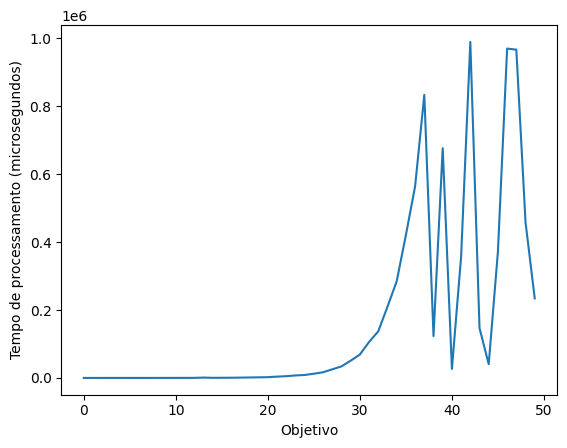

In [124]:
import matplotlib.pyplot as plt
plt.plot(valores_busca_largura)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')


# Busca em profundidade m = 100

In [125]:
# algoritimo para busca em profundidade
def calcula_iteracao_busca_em_profundidade(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaProfundidade()

    start_time = datetime.now()
    result = algorithm.search(state, m=100)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:
        return delta_t

valores_busca_profundidade_m100 = np.array([])

for i in range(1, 51):
    valores_busca_profundidade_m100 = np.append(valores_busca_profundidade_m100, calcula_iteracao_busca_em_profundidade(i).microseconds )

## Plot resultados busca em profundidade m = 100

Text(0.5, 0, 'Objetivo')

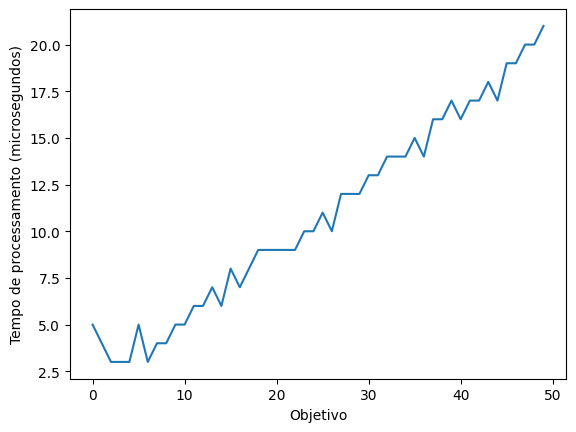

In [126]:
plt.plot(valores_busca_profundidade_m100)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')

# Busca em profundidade m = 10

In [127]:
# algoritimo para busca em profundidade
def calcula_iteracao_busca_em_profundidade(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaProfundidade()

    start_time = datetime.now()
    result = algorithm.search(state, m=10)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:
        return delta_t.microseconds
    else:
        return 0

valores_busca_profundidade_m10 = np.array([])

for i in range(1, 51):
    valores_busca_profundidade_m10 = np.append(valores_busca_profundidade_m10, calcula_iteracao_busca_em_profundidade(i) )

## Plot busca em profundidade m = 10

Text(0.5, 0, 'Objetivo')

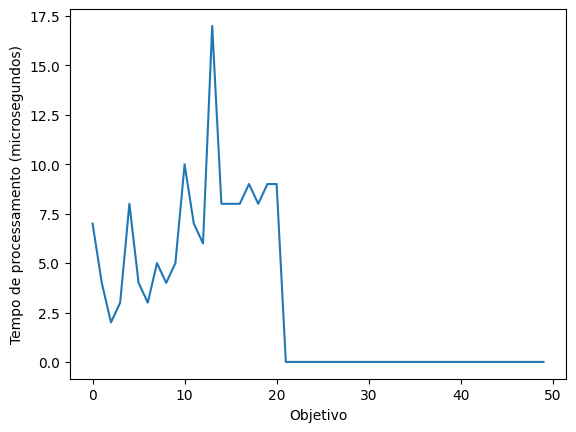

In [128]:
plt.plot(valores_busca_profundidade_m10)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')

# Busca em profundidade iterativa

In [129]:
# algoritimo para busca em profundidade
def calcula_iteracao_busca_em_profundidade_iterativa(i):

    # objetivo = int(input('Digite o valor objetivo: '))
    objetivo = i
    state = SumOne(1, '', objetivo)
    algorithm = BuscaProfundidadeIterativa()

    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()

    delta_t = end_time - start_time

    if result != None:
        return delta_t

valores_busca_profundidade_iterativa = np.array([])

for i in range(1, 51):
    valores_busca_profundidade_iterativa = np.append(valores_busca_profundidade_iterativa, calcula_iteracao_busca_em_profundidade_iterativa(i).microseconds )

## Plot resultados busca em profundiade iterativa

Text(0.5, 0, 'Objetivo')

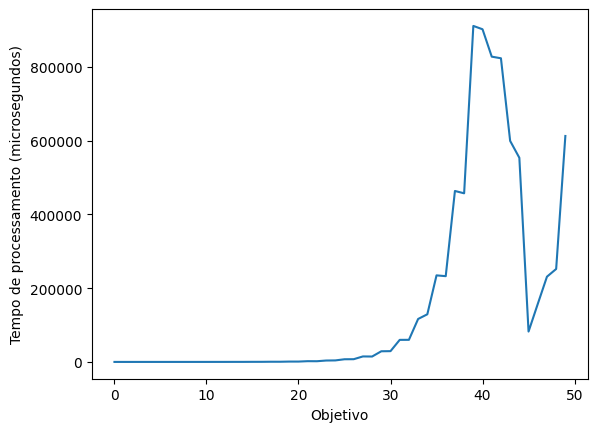

In [130]:
plt.plot(valores_busca_profundidade_iterativa)
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')

# Plot de todos os resultados

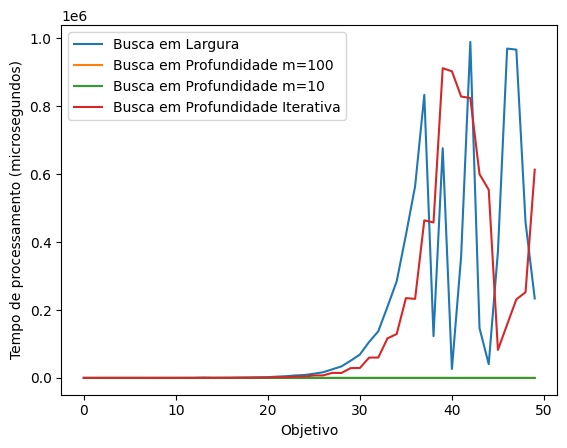

In [131]:
plt.plot(valores_busca_largura, label='Busca em Largura')
plt.plot(valores_busca_profundidade_m100, label='Busca em Profundidade m=100')
plt.plot(valores_busca_profundidade_m10, label='Busca em Profundidade m=10')

plt.plot(valores_busca_profundidade_iterativa, label='Busca em Profundidade Iterativa')
plt.ylabel('Tempo de processamento (microsegundos)')
plt.xlabel('Objetivo')
plt.legend()


## Tabela com os resultados

In [132]:
import pandas as pd

df = pd.DataFrame({'Busca em Largura': valores_busca_largura, 'Busca em Profundidade m = 100': valores_busca_profundidade_m100, 'Busca em Profundidade Iterativa': valores_busca_profundidade_iterativa, 'Busca em Profundidade m = 10': valores_busca_profundidade_m10})
df['Objetivo'] = df.index + 1
print(df.to_string(index=False))

 Busca em Largura  Busca em Profundidade m = 100  Busca em Profundidade Iterativa  Busca em Profundidade m = 10  Objetivo
              6.0                            5.0                              5.0                           7.0         1
              5.0                            4.0                              4.0                           4.0         2
              4.0                            3.0                              2.0                           2.0         3
             12.0                            3.0                              5.0                           3.0         4
              9.0                            3.0                              4.0                           8.0         5
             12.0                            5.0                              9.0                           4.0         6
             16.0                            3.0                              9.0                           3.0         7
             25.0       

`Segundo o que discutimos em sala de aula, quais destes algoritmos são ótimos? Os resultado encontrados neste exercício são coerentes com está informação? Justifique a sua resposta.`

Nessa análise, os algorítimos que encontraram soluções ótimas foram o de busca em largura e busca em profundiade iterativa. isso ocorre uma vez que ambos algoritimos analizam todas as possiblidades da árvore de busca antes de retornar uma resposta

`Segundo o que discutimos em sala de aula, quais destes algoritmos são completos? Os resultado encontrados neste exercício são coerentes com está informação? Justifique a sua resposta.`

Dentre os algoritimos analizados, o de busca em largura e o de busca em profundidade iterativa são completos. O de busca em profundidade só encontra uma solução se o m for grande o suficiente.

`Teve algum algoritmo que travou por falta de memória no seu computador? Se sim, qual é a explicação?`

Nenhum travou.


`Qual é o algoritmo que tem um tempo de processamento menor? Justifique a sua resposta.`

O algoritmo com o menor tempo de processamento foi o de busca em profundidade. Isso ocorreu uma vez que, para esse problema específico, conseguimos gerar vários nodos filhos rapidamente, fazendo que conseguissemos chegar a soma meta muito rápido.